In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import word_tokenize
import string

In [14]:
train_dataset = pd.read_csv('/kaggle/input/kma-ml2/kmaml223/train.csv')
train_comments = train_dataset['comment_text'].values
print('Train dataset number of samples: ' + str(train_comments.shape[0]))

Train dataset number of samples: 159571


In [15]:
test_dataset = pd.read_csv('/kaggle/input/kma-ml2/kmaml223/test.csv')
test_comments = test_dataset['comment_text'].values
print('Test dataset number of samples: ' + str(test_comments.shape[0]))

Test dataset number of samples: 63978


### Sample length histograms

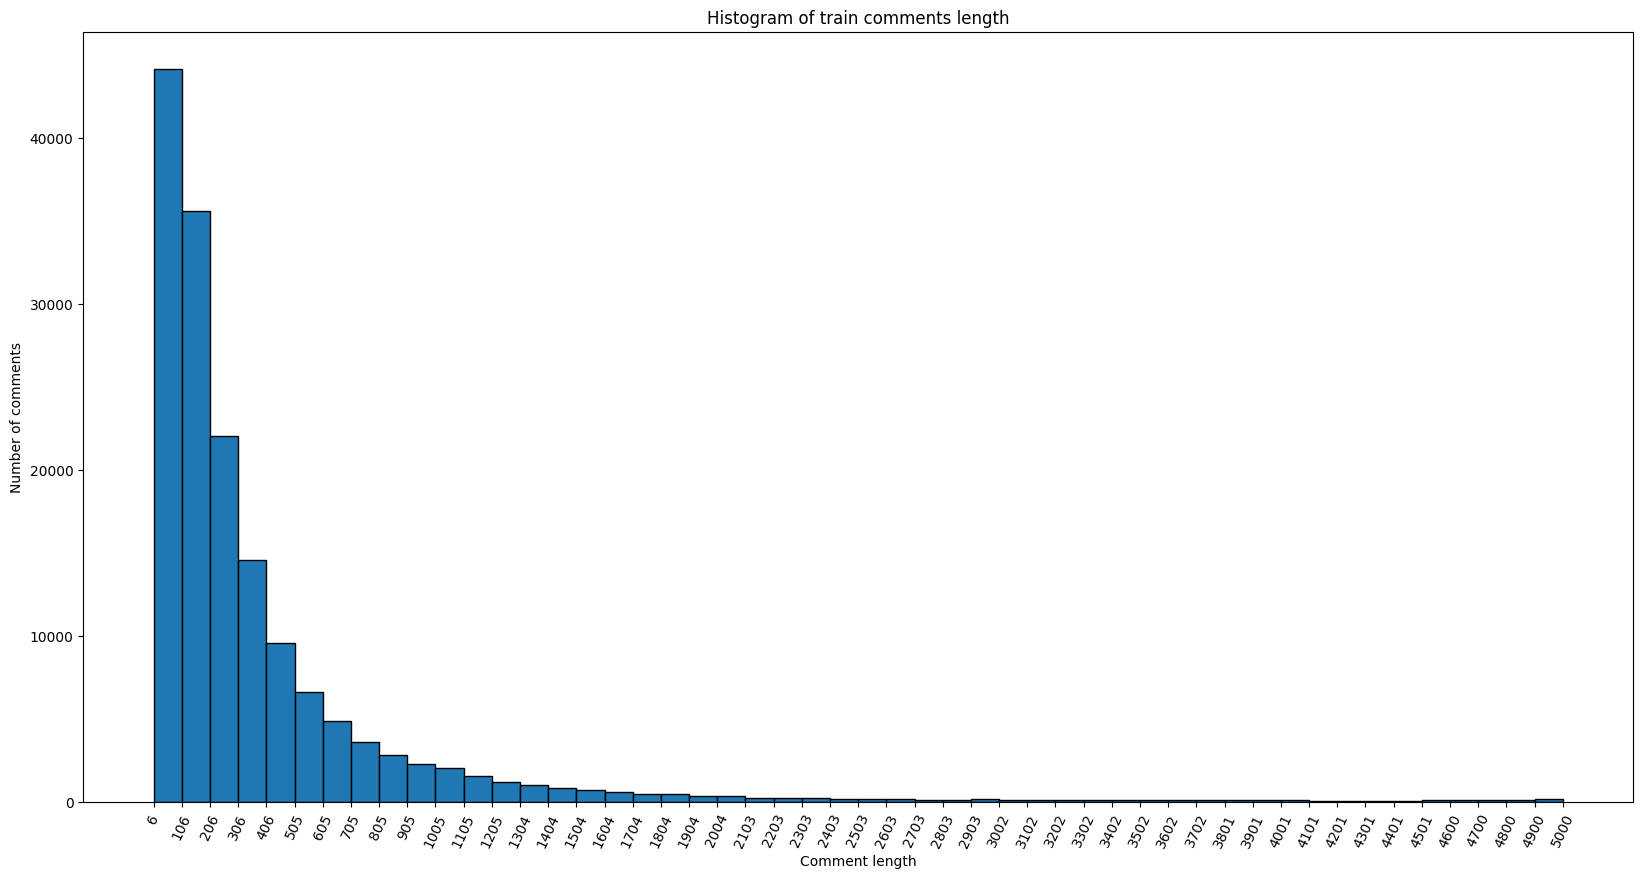

In [16]:
train_comments_length = [len(comment) for comment in train_comments]

plt.figure(figsize=(20, 10))
plt.hist(train_comments_length, bins=50, edgecolor='black')
bin_edges = np.histogram_bin_edges(train_comments_length, bins=50)
plt.xticks(bin_edges, rotation=65)

plt.xlabel('Comment length')
plt.ylabel('Number of comments')
plt.title('Histogram of train comments length')

plt.show()

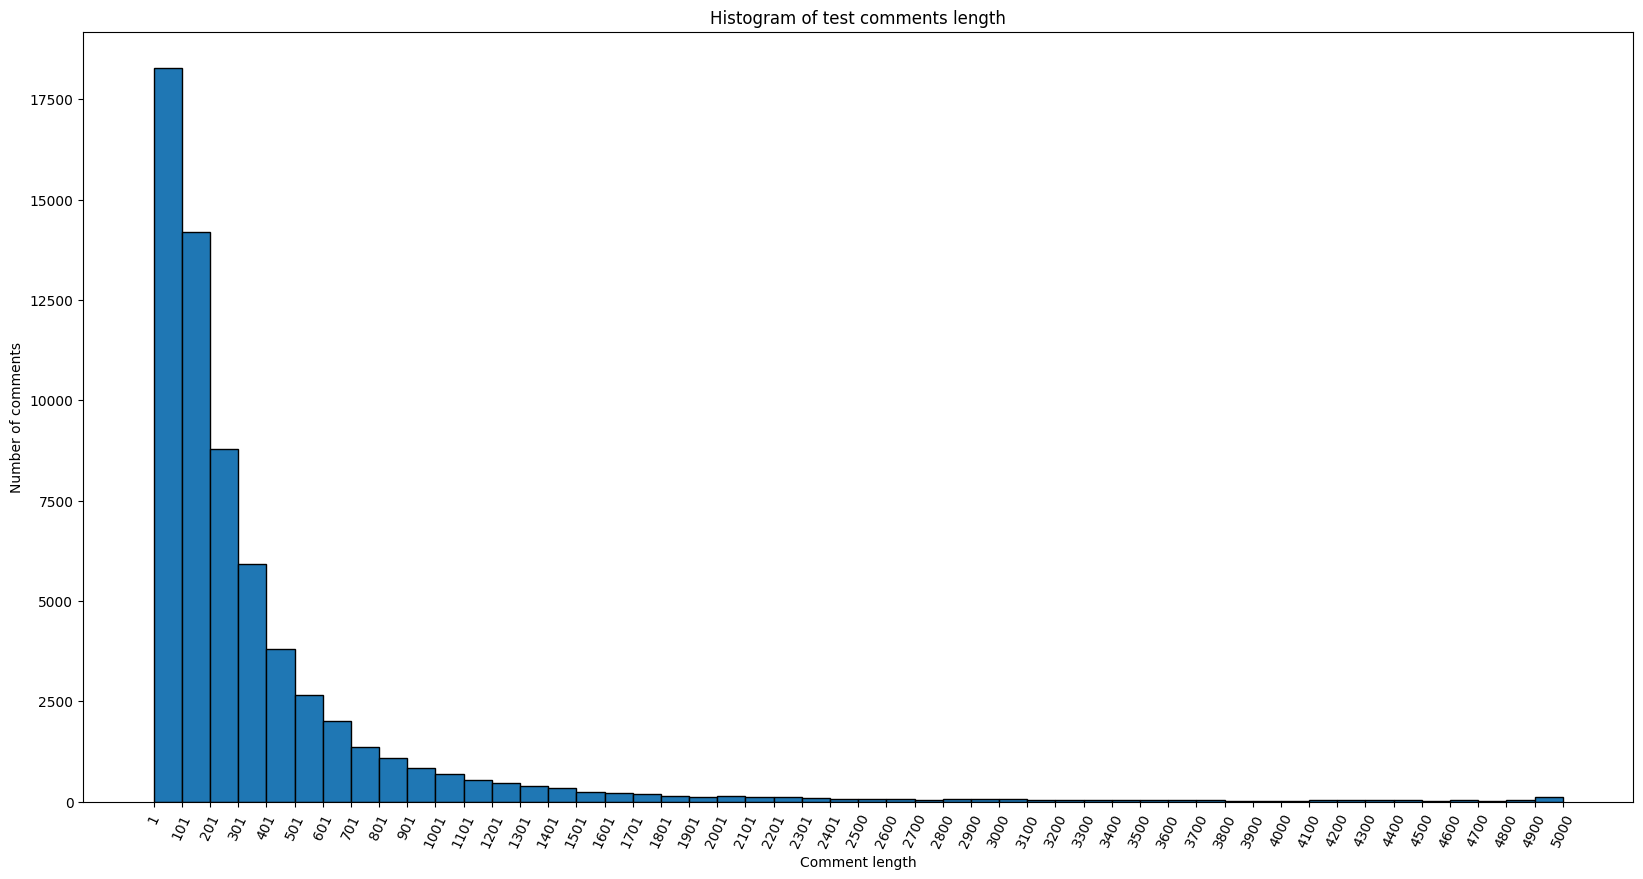

In [17]:
test_comments_length = [len(comment) for comment in test_comments]

plt.figure(figsize=(20, 10))
plt.hist(test_comments_length, bins=50, edgecolor='black')
bin_edges = np.histogram_bin_edges(test_comments_length, bins=50)
plt.xticks(bin_edges, rotation=65)

plt.xlabel('Comment length')
plt.ylabel('Number of comments')
plt.title('Histogram of test comments length')

plt.show()

### Collecting stats

In [18]:
# [0,  1,       2,       3,         4,      5,        6            ]
# [id, n_words, n_chars, n_symbols, n_caps, n_digits, n_punctuation]
def get_comment_stats(comment):
  id = comment[0]
  text = comment[1]
  n_words = len(word_tokenize(text))
  n_chars = len(text)
  n_symbols = sum(1 for char in text if not char.isspace())
  n_caps = sum(1 for char in text if char.isupper())
  n_digits = sum(1 for char in text if char.isdigit())
  n_punctuation = sum(1 for char in text if char in string.punctuation)
  return [id, n_words, n_chars, n_symbols, n_caps, n_digits, n_punctuation]

### Selecting Dataset Sample

In [19]:
train_comments = train_dataset['comment_text'].values

### Statistics

In [20]:
train_dataset_arrays = train_dataset.values.tolist()
train_dataset_stats = [ get_comment_stats(sample) for sample in train_dataset_arrays]
print(len(train_dataset_stats))

df = pd.DataFrame(train_dataset_stats, columns=['id', 'n_words', 'n_chars', 'n_symbols', 'n_caps', 'n_digits', 'n_punctuation'])
pd.set_option('display.expand_frame_repr', False)
print(df)

159571
                      id  n_words  n_chars  n_symbols  n_caps  n_digits  n_punctuation
0       0000997932d777bf       49      264        222      17         9             10
1       000103f0d9cfb60f       27      112         95       8        10             12
2       000113f07ec002fd       48      233        192       4         0              6
3       0001b41b1c6bb37e      128      622        507      11         0             21
4       0001d958c54c6e35       18       67         55       2         0              5
...                  ...      ...      ...        ...     ...       ...            ...
159566  ffe987279560d7ff       63      295        245       2         0             18
159567  ffea4adeee384e90       19       99         79       2         9              4
159568  ffee36eab5c267c9       15       81         67       4         0              4
159569  fff125370e4aaaf3       26      116         92       2         0              1
159570  fff46fc426af1f9a       44   

In [21]:
test_dataset_arrays = test_dataset.values.tolist()
test_dataset_stats = [ get_comment_stats(sample) for sample in test_dataset_arrays]

df = pd.DataFrame(test_dataset_stats, columns=['id', 'n_words', 'n_chars', 'n_symbols', 'n_caps', 'n_digits', 'n_punctuation'])
pd.set_option('display.expand_frame_repr', False)
print(df)

           id  n_words  n_chars  n_symbols  n_caps  n_digits  n_punctuation
0           5        1       16         16       0        11              0
1           7        1       16         16       0        12              0
2          11        1       16         16       0        12              0
3          13        1       16         16       0         8              0
4          14        1       16         16       0        10              0
...       ...      ...      ...        ...     ...       ...            ...
63973  153150        1       16         16       0        10              0
63974  153151        1       16         16       0        10              0
63975  153154        1       16         16       0        10              0
63976  153155        1       16         16       0         7              0
63977  153156        1       16         16       0         8              0

[63978 rows x 7 columns]
